# IDENTIFICATION OF TIP BURN DISEASE USING GLCM AND RF CLASSIFIER

## Setting the path

In [1]:
data = "D:/VIT/Sem -V/A1 - DIP/Dataset/dataset - strawberry leaves"
disease = "D:/VIT/Sem -V/A1 - DIP/Dataset/dataset - strawberry leaves/Calciumdeficiency"
healthy = "D:/VIT/Sem -V/A1 - DIP/Dataset/dataset - strawberry leaves/healthy"

## Defining the dataframe

In [2]:
import os
dirlist = [disease,healthy]
classes = ['1','0']
# class "1" represents disease leaves
# class "0" represents healthy leaves
filepaths=[]
labels=[]
for i,j in zip(dirlist,classes):
    filelist = os.listdir(i)
    for f in filelist:
        filepath = os.path.join(i,f)
        filepaths.append(filepath)
        labels.append(j)

In [3]:
#Finding the length of the data

print('filepaths: ',len(filepaths),'labels: ',len(labels))

filepaths:  1431 labels:  1431


In [4]:
#Defining a dataframe with filepaths and labels as columns

import pandas as pd
Files = pd.Series(filepaths,name='filepaths')
Label=pd.Series(labels,name='labels')
df = pd.concat([Files,Label],axis=1)

In [5]:
df.head()

filepaths labels
0  D:/VIT/Sem -V/A1 - DIP/Dataset/dataset - straw...      1
1  D:/VIT/Sem -V/A1 - DIP/Dataset/dataset - straw...      1
2  D:/VIT/Sem -V/A1 - DIP/Dataset/dataset - straw...      1
3  D:/VIT/Sem -V/A1 - DIP/Dataset/dataset - straw...      1
4  D:/VIT/Sem -V/A1 - DIP/Dataset/dataset - straw...      1

C:\Users\Prathyuma\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


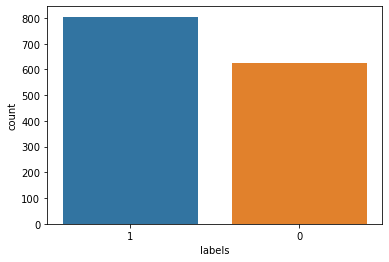

In [6]:
#Plotting the number of diseased and healthy leaves

import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(data = df,x = 'labels')
plt.plot()
plt.show()

In [6]:
df['labels'].value_counts()

#1 represents - diseased leaves
#0 represents - healthy leaves

1    805
0    626
Name: labels, dtype: int64

In [7]:
#Generating a random list 
import random

randomlist = []
for i in range(0,5):
    n = random.randint(1,1431)
    randomlist.append(n)

<Figure size 288x288 with 0 Axes>

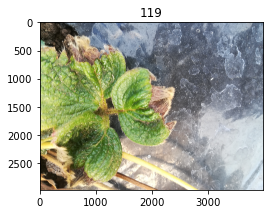

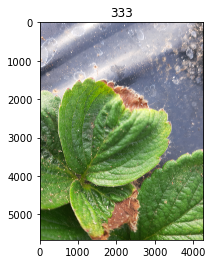

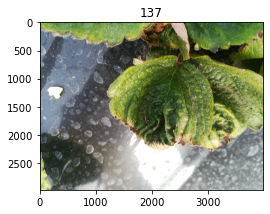

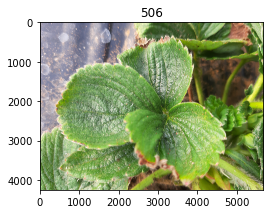

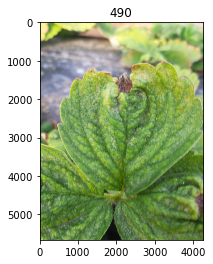

In [16]:
#Printing a random number of input images

from skimage.io import imread
import matplotlib.pyplot as plt

plt.figure(figsize=(4,4))
for i in randomlist:
    fig, ax = plt.subplots(figsize=(4,4))
    img = imread(df['filepaths'][i])
    ax.imshow(img)
    ax.set_title(i)

## Pre-processing

#### Image resizing

In [11]:
#Dimensions of the image

pic = plt.imread(df['filepaths'][3])
print('Type of the image : ' , type(pic))
print('Image size {}'.format(pic.size))
print('Maximum RGB value in this image {}'.format(pic.max()))
print('Minimum RGB value in this image {}'.format(pic.min()))

for i in randomlist:
    pic = plt.imread(df['filepaths'][i])
    print('Shape of the image {} : {}'.format(i,pic.shape))
    print('Image Height: {}'.format(pic.shape[0]))
    print('Image Width: {}'.format(pic.shape[1]))
    print('Dimension of Image: {}'.format(pic.ndim))

Type of the image :  <class 'numpy.ndarray'>
Image size 35426304
Maximum RGB value in this image 255
Minimum RGB value in this image 0
Shape of the image 119 : (2976, 3968, 3)
Image Height: 2976
Image Width: 3968
Dimension of Image: 3
Shape of the image 333 : (4248, 5664, 3)
Image Height: 4248
Image Width: 5664
Dimension of Image: 3
Shape of the image 137 : (2976, 3968, 3)
Image Height: 2976
Image Width: 3968
Dimension of Image: 3
Shape of the image 506 : (4248, 5664, 3)
Image Height: 4248
Image Width: 5664
Dimension of Image: 3
Shape of the image 490 : (4248, 5664, 3)
Image Height: 4248
Image Width: 5664
Dimension of Image: 3


In [12]:
import numpy as np
from tensorflow.keras.preprocessing.image import load_img

#Defining a function to resize the image

def load_resize_color_image(path):
    image = load_img(path,target_size=(300,300))
    return np.array(image)

<Figure size 288x288 with 0 Axes>

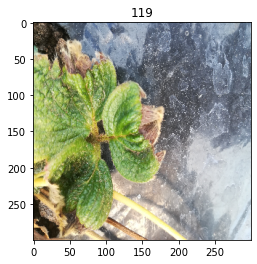

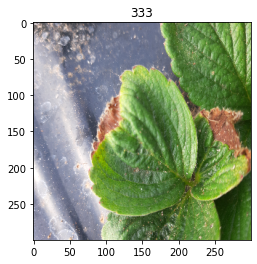

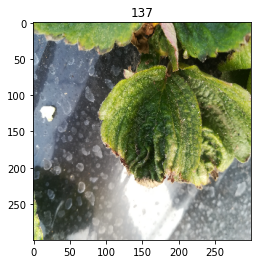

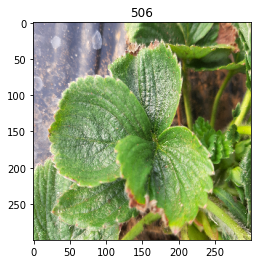

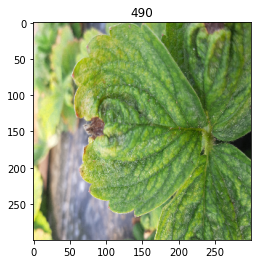

In [17]:
plt.figure(figsize=(4,4))
for i in randomlist:
    fig, ax = plt.subplots(figsize=(4,4))
    img = load_resize_color_image(df['filepaths'][i])
    ax.imshow(img)
    ax.set_title(i)

#### Background removal

In [18]:
#Display palette with percentage 

from collections import Counter
def palette_perc(k_cluster):
    width = 300
    palette = np.zeros((50, width, 3), np.uint8)    
    n_pixels = len(k_cluster.labels_)
    counter = Counter(k_cluster.labels_) # count how many pixels per cluster
    perc = {}
    for i in counter:
        perc[i] = np.round(counter[i]/n_pixels, 2)
    perc = dict(sorted(perc.items()))  
    step = 0    
    for idx, centers in enumerate(k_cluster.cluster_centers_): 
        palette[:, step:int(step + perc[idx]*width+1), :] = centers
        step += int(perc[idx]*width+1)        
    return palette

#Display the image and the color palette

def show_img_compar(img_1, img_2 ):
    f, ax = plt.subplots(1, 2, figsize=(10,10))
    ax[0].imshow(img_1)
    ax[1].imshow(img_2)
    ax[0].axis('off')
    ax[1].axis('off')
    f.tight_layout()
    plt.show()
    
#Finding the most dominant color in the given input image

from sklearn.cluster import KMeans
def show_palette(i):
    resized_pic = load_resize_color_image(df['filepaths'][i])
    clt = KMeans(n_clusters=5) #Using KMeans algorithm 
    clt_1 = clt.fit(resized_pic.reshape(-1, 3))
    show_img_compar(resized_pic, palette_perc(clt_1))

119


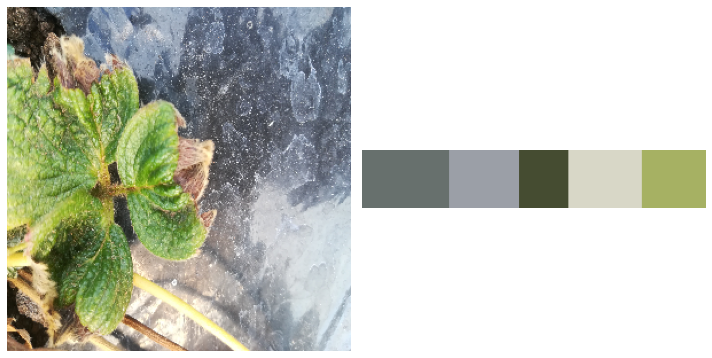

333


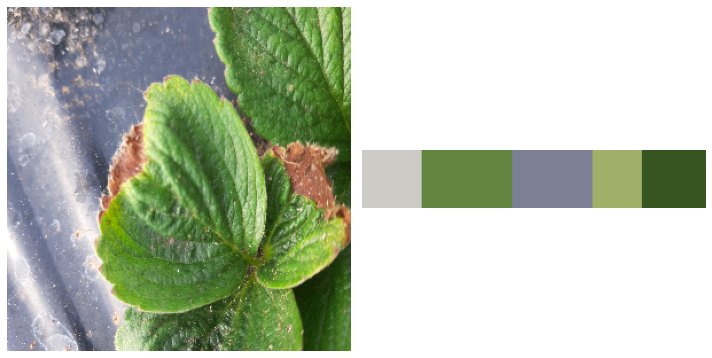

137


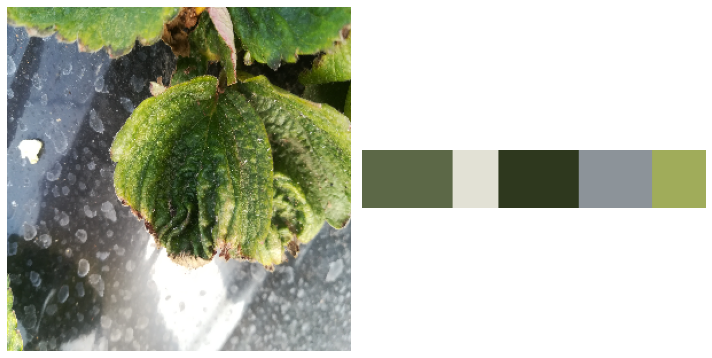

506


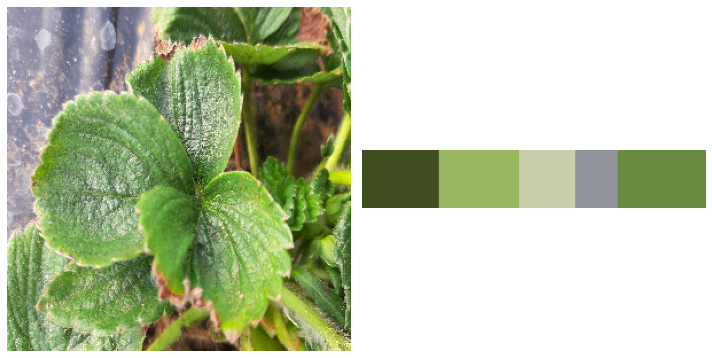

490


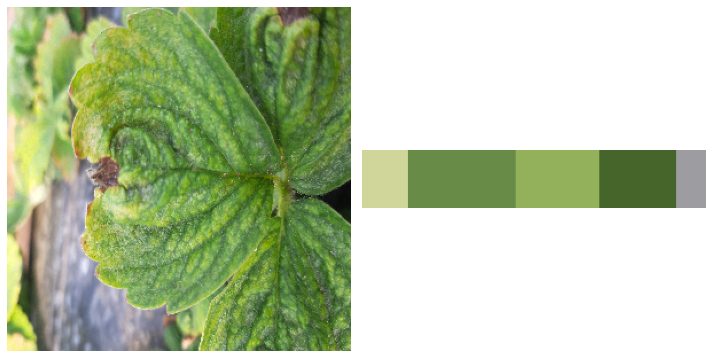

In [19]:
for x in randomlist:
    print(x)
    show_palette(x)

In [20]:
import cv2
def kmeans(i):
    original_image = cv2.imread(df['filepaths'][i])
    img=cv2.cvtColor(original_image,cv2.COLOR_BGR2RGB)
    vectorized = img.reshape((-1,3))
    vectorized = np.float32(vectorized)
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
    ret,label,center=cv2.kmeans(vectorized,2,None,criteria,10,cv2.KMEANS_PP_CENTERS) 
    center = np.uint8(center)
    res = center[label.flatten()]
    result_image = res.reshape((img.shape))
    plt.figure(figsize=(15,15))
    plt.subplot(1,2,1),plt.imshow(img)
    plt.title('Original Image'), plt.xticks([]), plt.yticks([])
    plt.subplot(1,2,2),plt.imshow(result_image)
    plt.title('Segmented Image when K = 2' ), plt.xticks([]), plt.yticks([])
    plt.show()
    return result_image

from skimage.color import rgb2gray
from skimage.filters import threshold_otsu

def otsu_threshold(i):
    img = kmeans(i)
    gray_img = rgb2gray(img)
    hist = np.histogram(img.flatten())
    threshold_s = threshold_otsu(gray_img)
    bin_img = gray_img > threshold_s   
    
    fig, ax = plt.subplots(figsize=(10,5))
    ax.imshow(bin_img,cmap="gray")
    ax.set_title("Binary image")   
    ax.axis('off')

119


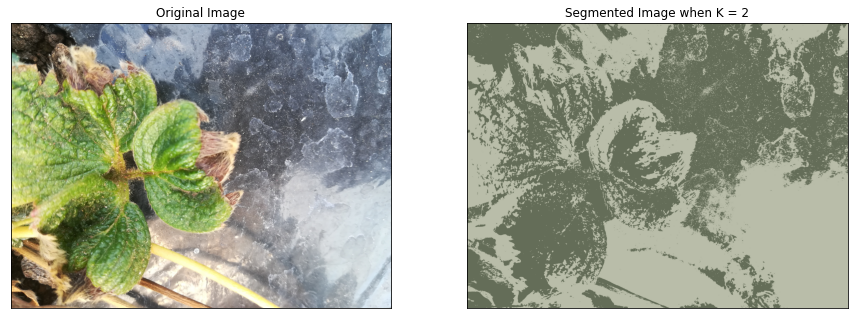

333


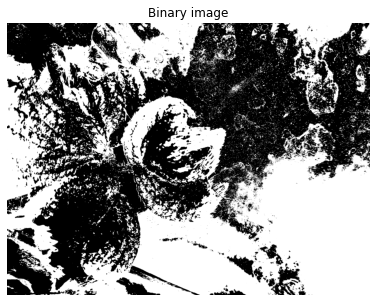

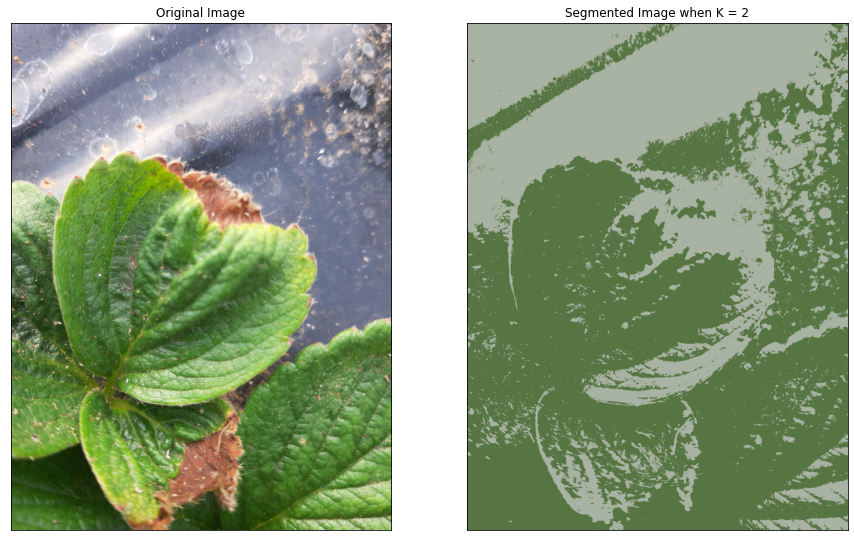

137


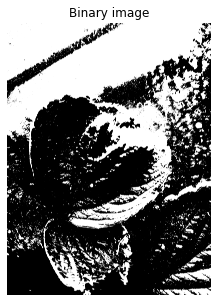

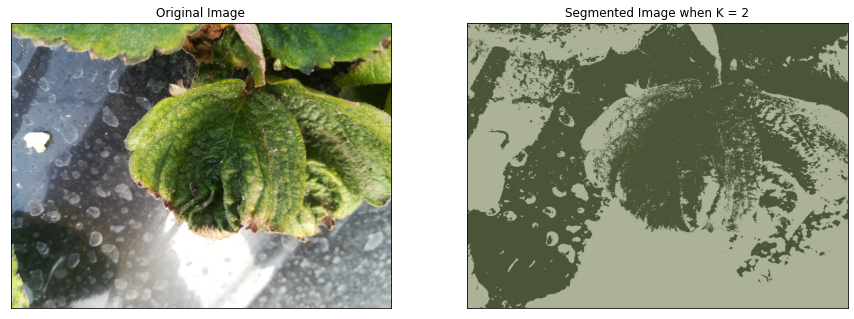

506


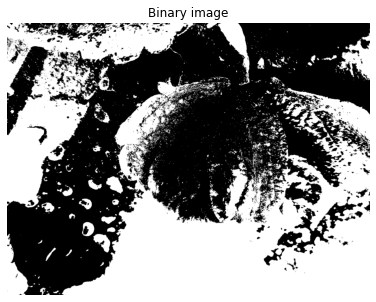

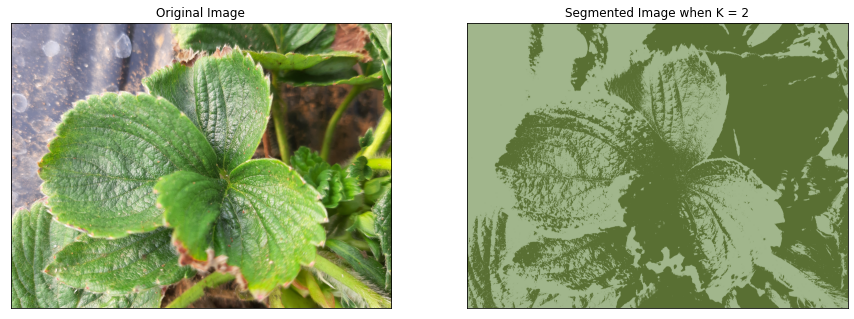

490


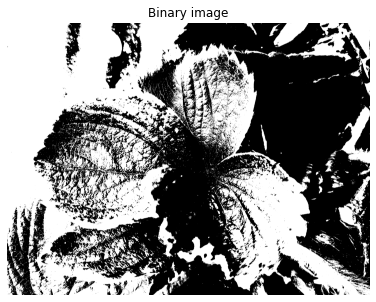

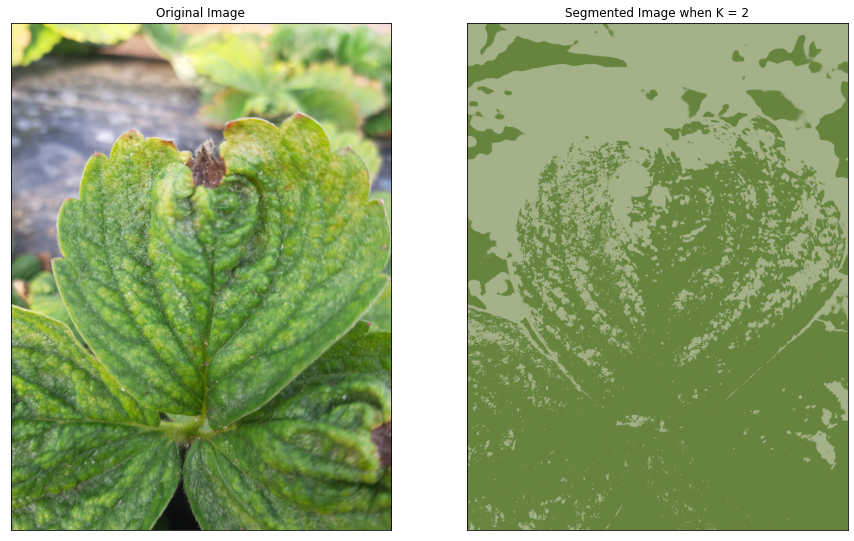

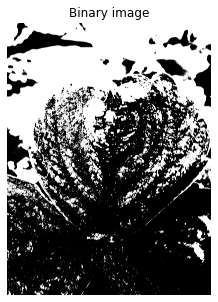

In [21]:
for l in randomlist:
    print(l)
    otsu_threshold(l)

## Feature Extraction

In [22]:
import pickle

In [23]:
from tensorflow.keras.preprocessing.image import img_to_array

disease_list = [] #List containing the labels of the input images
image_list = []
for idx,row in df.iterrows():
    path = row['filepaths']
    disease = row['labels']
    image = load_resize_color_image(path)
    image_array = img_to_array(image)
    image_list.append(image_array)
    disease_list.append(disease)
    
    
with open("disease_list","wb") as fp:
    pickle.dump(disease_list,fp)
    
with open("image_list","wb") as fp:
    pickle.dump(image_list,fp)

In [24]:
with open("disease_list","rb") as fp:
    disease_list_pickle = pickle.load(fp)
    
with open("image_list","rb") as fp:
    image_list_pickle = pickle.load(fp)

In [25]:
from skimage.feature import greycomatrix, greycoprops
import numpy as np

def calc_glcm_all_agls(img, label, props, dists=[5], agls=[0, np.pi/4, np.pi/2, 3*np.pi/4], lvl=256, sym=True, norm=True):
    glcm = greycomatrix(img.astype(int), 
                        distances=dists, 
                        angles=agls, 
                        levels=lvl,
                        symmetric=sym, 
                        normed=norm)
    feature = []
    glcm_props = [propery for name in props for propery in greycoprops(glcm, name)[0]]
    for item in glcm_props:
            feature.append(item)
    feature.append(label)     
    return feature

properties = ['ASM','contrast','dissimilarity','correlation','homogeneity']

In [26]:
import cv2
glcm_all_agls = []

for img, label in zip(image_list_pickle,disease_list_pickle):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    glcm_all_agls.append(calc_glcm_all_agls
                         (gray,label,props=properties))
    


columns = []

angles = ['0', '45', '90','135']
for name in properties :
    for ang in angles:
        columns.append(name + "_" + ang)
        
columns.append("label")

In [27]:
glcm_df = pd.DataFrame(glcm_all_agls, 
                      columns = columns)

glcm_df.shape

(1431, 21)

In [28]:
glcm_df.head()

ASM_0    ASM_45    ASM_90   ASM_135   contrast_0  contrast_45  \
0  0.000118  0.000116  0.000123  0.000114   765.475864   818.470188   
1  0.000128  0.000133  0.000162  0.000132   916.980667   871.672891   
2  0.000131  0.000139  0.000156  0.000129   702.745944   666.942522   
3  0.000051  0.000047  0.000050  0.000049  1732.023740  2012.383366   
4  0.000068  0.000066  0.000071  0.000068  1438.772147  1592.797332   

   contrast_90  contrast_135  dissimilarity_0  dissimilarity_45  ...  \
0   729.957740    825.580305        19.270034         19.948503  ...   
1   659.102260    885.617741        20.863040         20.183277  ...   
2   526.051051    699.753173        18.218328         17.409126  ...   
3  1875.574881   1867.232047        29.498429         32.083193  ...   
4  1502.177412   1535.416077        26.402000         27.805116  ...   

   dissimilarity_135  correlation_0  correlation_45  correlation_90  \
0          20.104501       0.737158        0.718916        0.749180   
1          20.512418       0.782088        0.792564        0.844174   
2          18.259428       0.821888        0.831784        0.868737   
3          30.533727       0.730641        0.686745        0.707739   
4          27.036945       0.741131        0.711785        0.727997   

   correlation_135  homogeneity_0  homogeneity_45  homogeneity_90  \
0         0.716312       0.069601        0.067715        0.071475   
1         0.789259       0.071953        0.075581        0.097334   
2         0.823553       0.076983        0.084138        0.098933   
3         0.709324       0.045609        0.040866        0.045273   
4         0.722001       0.056387        0.052605        0.057394   

   homogeneity_135  label  
0         0.065350      1  
1         0.074732      1  
2         0.077594      1  
3         0.042913      1  
4         0.056293      1  

[5 rows x 21 columns]

In [29]:
glcm_df.to_csv('glcm.csv')

## Training the model

In [30]:
glcm_df = pd.read_csv('glcm.csv')

In [31]:
X_data = glcm_df.iloc[:,1:21]
y_data = glcm_df['label']

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_data,y_data,train_size=0.8,random_state=42)
print(X_train.shape) #The shape of X_train
print(y_train.shape) #The shape of y_train
print(X_test.shape)
print(y_test.shape)

(1144, 20)
(1144,)
(287, 20)
(287,)


In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid={
    'n_estimators': [10,25,50,75,100],
    'max_features': [10,15,20],
    'criterion': ['gini','entropy'],
    'max_depth': [4,5,6,7]
}

rf = RandomForestClassifier(random_state=1)
gs = GridSearchCV(rf,param_grid,cv=5)
gs.fit(X_train,y_train)
print("Best parameters:",gs.best_params_)

In [35]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(max_depth = 5, max_features = 10,criterion='entropy', n_estimators=25,random_state=11)
model.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=5, max_features=10,
                       n_estimators=25, random_state=11)

In [42]:
y_pred = model.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.8885017421602788


In [43]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[107  24]
 [  8 148]]


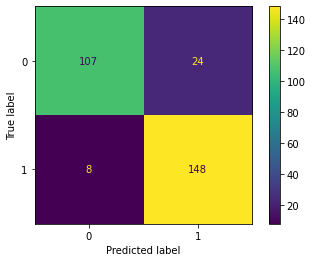

In [44]:
plot_confusion_matrix(model,X_test,y_test)
plt.show()

In [39]:
with open("ML_model", "wb") as file:
    pickle.dump(model, file)

## Testing Model

In [41]:
with open("ML_model", "rb") as file:
    model =  pickle.load(file)

In [45]:
def print_result(predictions):
    if predictions==1:
        return "Diseased"
    else:
        return "Healthy"

In [46]:
import numpy as np
def glcm_test(img,props, dists=[5], agls=[0, np.pi/4, np.pi/2, 3*np.pi/4], lvl=256, sym=True, norm=True):
    glcm = greycomatrix(img.astype(int), 
                        distances=dists, 
                        angles=agls, 
                        levels=lvl,
                        symmetric=sym, 
                        normed=norm)
    feature = []
    glcm_props = [propery for name in props for propery in greycoprops(glcm, name)[0]]
    for item in glcm_props:
            feature.append(item)
    return feature

In [48]:
randomlist = []
for i in range(0,5):
    n = random.randint(1,1431)
    randomlist.append(n)

391 Predicted:  Diseased
1076 Predicted:  Diseased
1235 Predicted:  Healthy
492 Predicted:  Diseased
171 Predicted:  Diseased


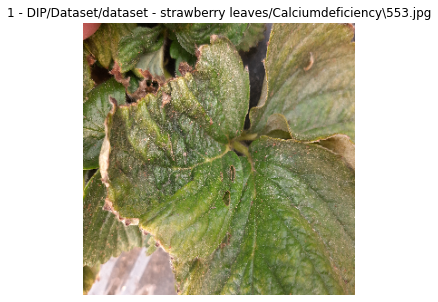

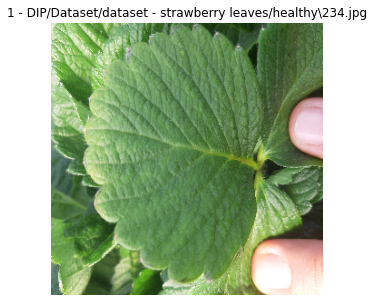

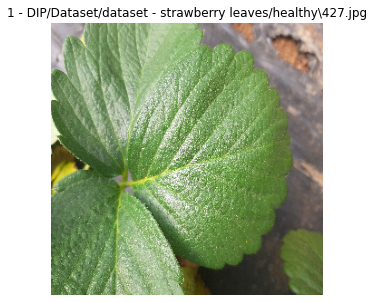

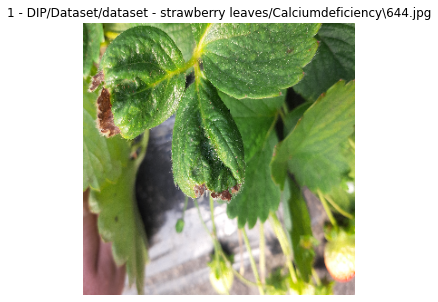

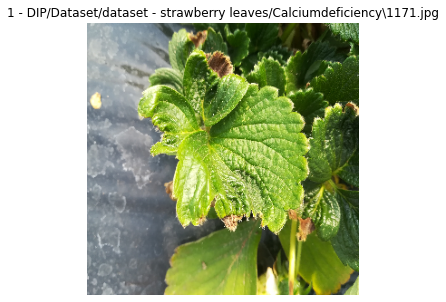

In [49]:
import re
from tensorflow.keras.preprocessing.image import img_to_array
import cv2
import matplotlib.pyplot as plt

for i in randomlist:
    pic = load_resize_color_image(df['filepaths'][i])
    image_array = img_to_array(pic)
    gray = cv2.cvtColor(image_array, cv2.COLOR_BGR2GRAY)
    fig, ax = plt.subplots(figsize=(10,5))
    img_name = re.sub(r'^\D+','',df['filepaths'][i])
    ax.imshow(pic) 
    ax.set_title(img_name)
    ax.axis('off')
    vec = glcm_test(gray,props=properties)
    vec = np.array(vec)
    predictions = model.predict(vec.reshape(1,-1))
    print(i,"Predicted: ",print_result(predictions))

## Model Validation

In [50]:
from sklearn.model_selection import cross_validate

def cross_validation(model,X,y,cv=5):
    scoring = ['accuracy','precision','recall','f1']
    results = cross_validate(estimator=model,
                            X=X,y=y,cv=cv,scoring=scoring,return_train_score=True)
    return {
        "Training accuracy scores": results['train_accuracy'],
        "Mean training accuracy": results['train_accuracy'].mean()*100,
        "Training precision scores": results['train_precision'],
        "Mean training precision": results['train_precision'].mean(),
        "Training recall scores": results['train_recall'],
        "Mean training recall": results['train_recall'].mean(),
        "Training f1 score": results['train_f1'],
        "Mean training f1 score": results['train_f1'].mean(),
        "Validation accuracy scores": results['test_accuracy'],
        "Mean Validation accuracy": results['test_accuracy'].mean()*100,
        "Validation precision scores": results['test_precision'],
        "Mean validation precision": results['test_precision'].mean(),
        "Validation recall scores": results['test_recall'],
        "Mean validation recall": results['test_recall'].mean(),
        "Validation f1 score": results['test_f1'],
        "Mean validation f1 score": results['test_f1'].mean(),
    }

In [51]:
def plot_results(X_label, y_label, plot_title, train_data, val_data):
    plt.figure(figsize=(12,6))
    labels=["1st Fold","2nd Fold","3rd Fold","4th Fold","5th Fold"]
    X_axis=np.arange(len(labels))
    ax=plt.gca()
    plt.ylim(0.4000,1)
    plt.bar(X_axis-0.2,train_data,0.4,color='blue',label='Training')
    plt.bar(X_axis+0.2,val_data,0.4,color='red',label='Validation')
    plt.title(plot_title,fontsize=30)
    plt.xticks(X_axis,labels)
    plt.xlabel(X_label,fontsize=14)
    plt.ylabel(y_label,fontsize=14)
    plt.legend()
    plt.grid(True)
    plt.show()

In [54]:
print("Mean Training accuracy",result['Mean training accuracy'])
print("Mean Training precision",result['Mean training precision'])
print("Mean Training recall",result['Mean training recall'])
print("Mean Training f1 score",result['Mean training f1 score'])

Mean Training accuracy 88.96401555825996
Mean Training precision 0.8706046153818562
Mean Training recall 0.946456943826886
Mean Training f1 score 0.9068623240092165


In [55]:
print("Mean Validation accuracy",result['Mean Validation accuracy'])
print("Mean Validation precision",result['Mean validation precision'])
print("Mean Validation recall",result['Mean validation recall'])
print("Mean Validation f1 score",result['Mean validation f1 score'])

Mean Validation accuracy 81.03309584003678
Mean Validation precision 0.8049278642770809
Mean Validation recall 0.8798211091234347
Mean Validation f1 score 0.8404271909604925


#### ACCURACY

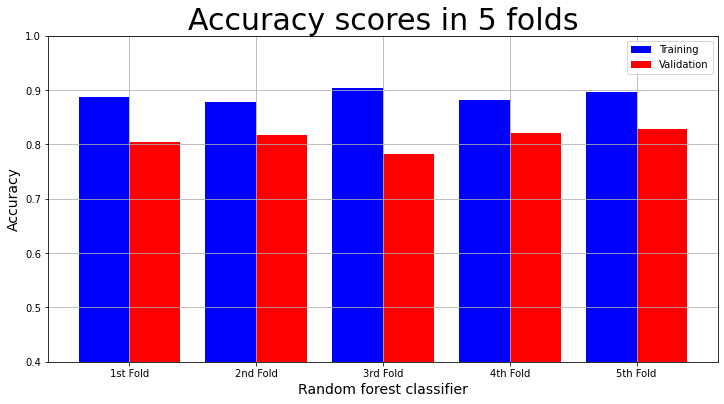

In [53]:
import matplotlib.pyplot as plt

model = RandomForestClassifier(max_depth = 5, max_features = 15,criterion='gini', n_estimators=50,random_state=11)
result = cross_validation(model,X_train,y_train,5)

model_name= "Random forest classifier"
plot_results(model_name,"Accuracy","Accuracy scores in 5 folds",
           result["Training accuracy scores"],
           result["Validation accuracy scores"])

#### PRECISION

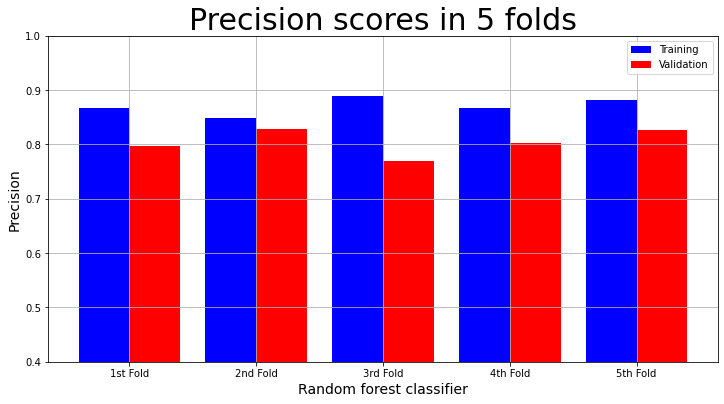

In [56]:
model_name= "Random forest classifier"
plot_results(model_name,"Precision","Precision scores in 5 folds",
           result["Training precision scores"],
           result["Validation precision scores"])

#### RECALL

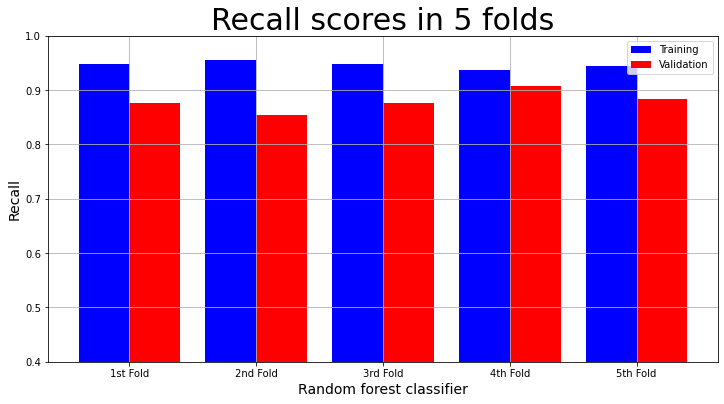

In [57]:
model_name= "Random forest classifier"
plot_results(model_name,"Recall","Recall scores in 5 folds",
           result["Training recall scores"],
           result["Validation recall scores"])

#### F1 SCORE

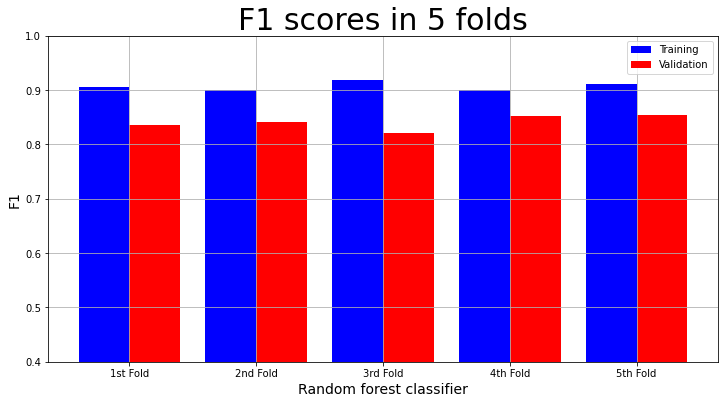

In [58]:
model_name= "Random forest classifier"
plot_results(model_name,"F1","F1 scores in 5 folds",
           result["Training f1 score"],
           result["Validation f1 score"])